<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/KaggleTitanic/KaggleTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries we will use

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

Import the 3 data sets that are given via https://www.kaggle.com/c/titanic/data

In [4]:
#Reading the files given:
train_df             = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTrain.csv")
test_df              = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTest.csv")
sample_submission_df = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicSampleSubmission.csv")

In [17]:
#Output verification of datasets imported and read
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Note that the 'Test' set is missing the 'Survived' Column as it is the target/response variable that is in question.

In [18]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [20]:
#Shows the output form: 2 columns = PassengerId and Survived column, with test_df amount of rows.
#The shape that is desired.
sample_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
ad



---
*Data Description found on* https://www.kaggle.com/c/titanic/data

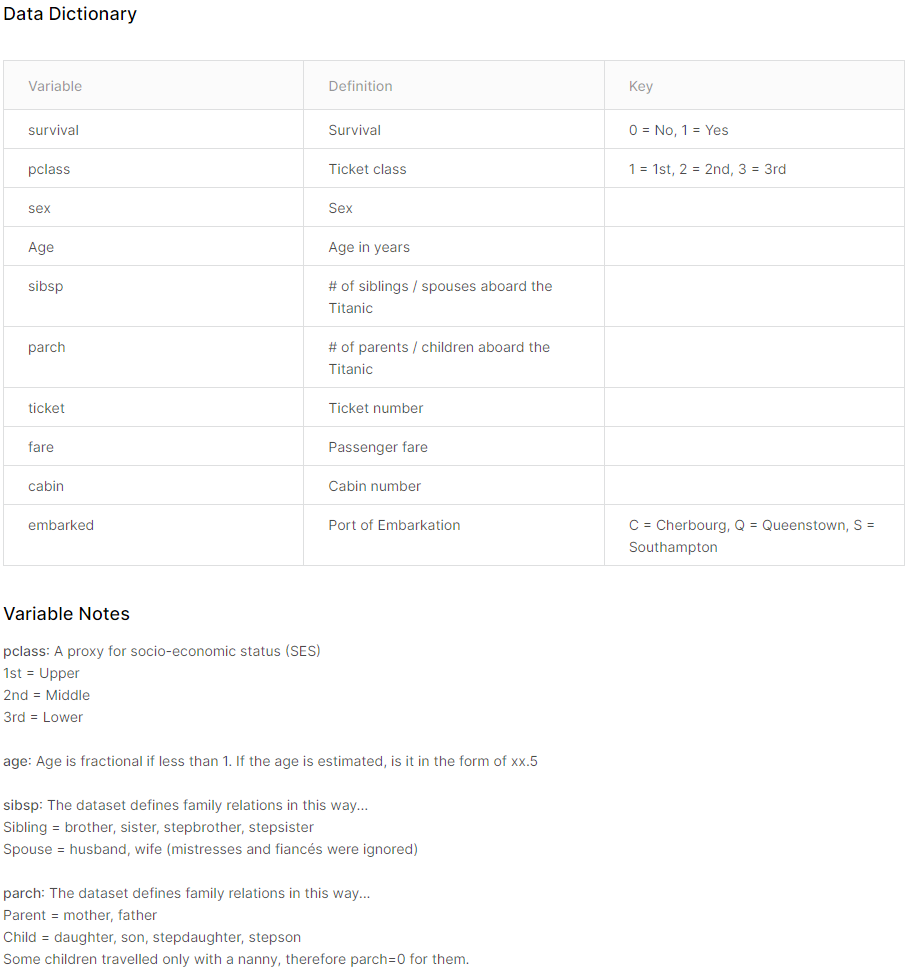

---

Determine information about the data we are using

In [14]:
#train_df information/description:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# check missing values in training data
print("Missing Values: ")
print(train_df.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<font color='gray'>Here we can see that Age , Cabin, and Emabrked are the only columns with NULL/empty data. </font>

In [ ]:
#Numerical and Categorical Values Separated Accordingly
numericals_df = train_df[['Age', 'SibSp', 'Parch', 'Fare']] #PassengerId not needed #histograms
categoricals_df = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']] #value counts

print("Numericals:\n" , numericals_df)
print("\nCategoricals: \n" , categoricals_df)

Numericals:
       Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]

Categoricals: 
      Survived  Pclass     Sex            Ticket Cabin Embarked
0           0       3    male         A/5 21171   NaN        S
1           1       1  female          PC 17599   C85        C
2           1       3  female  STON/O2. 3101282   NaN        S
3           1       1  female            113803  C123        S
4           0       3    male            373450   NaN        S
..        ...     ...     ...               ...   ...      ...
886         0       2    male            211536   NaN        S
887         1       1  female            11205

Age Distribution w/ Density Curve (Red):
Age Min:  0.42
Age Max:  80.0


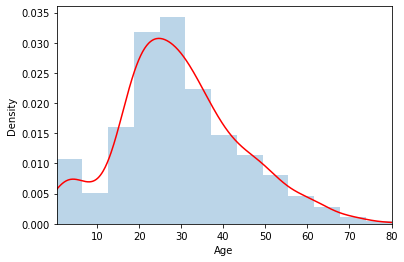

SibSp Distribution w/ Density Curve (Red):
SibSp Min:  0
SibSp Max:  8


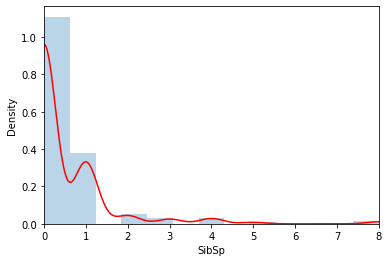

Parch Distribution w/ Density Curve (Red):
Parch Min:  0
Parch Max:  6


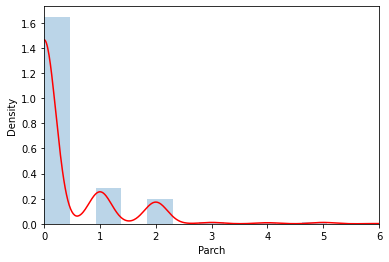

Fare Distribution w/ Density Curve (Red):
Fare Min:  0.0
Fare Max:  512.3292


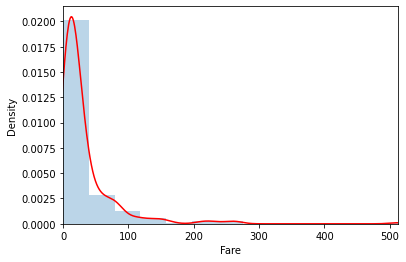

In [ ]:
#Histogram showing distribution of all '[Numerical Column Name]' with the density curve plotted against it
for col in numericals_df.columns:
  print( col, "Distribution w/ Density Curve (Red):")
  print( col, "Min: ", train_df[col].min())
  print( col, "Max: ", train_df[col].max())
  ax = train_df[col].hist(bins=13, density=True, alpha=0.3) # Histogram
  train_df[col].plot(kind='density', color='red') #Density curve
  ax.set(xlabel= col) #X-Axis label
  plt.xlim(train_df[col].min(),train_df[col].max()) # Limits of values for the X - Axis
  plt.show()    

Survived Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


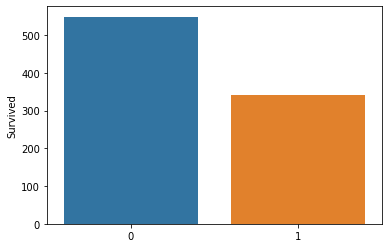

Pclass Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


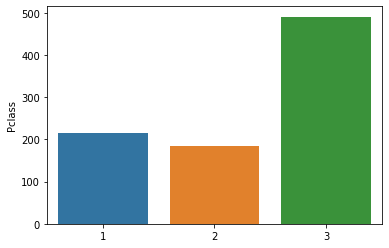

Sex Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


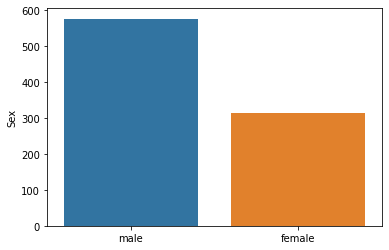

Ticket Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


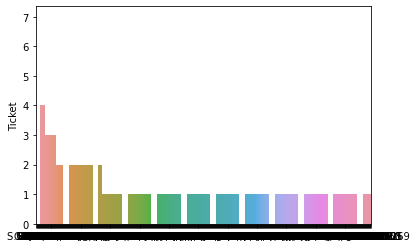

Cabin Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


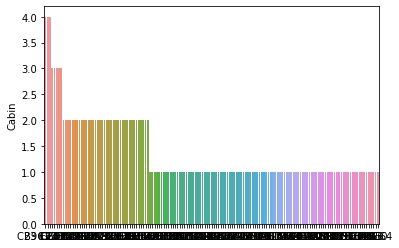

Embarked Bar Chart:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


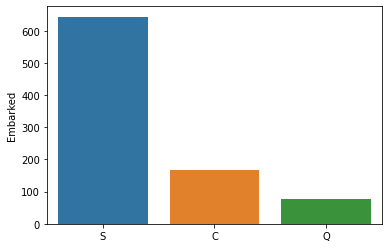

In [ ]:
#Categoricals shown
for col in categoricals_df.columns:
  print( col, "Bar Chart:")
  #barplot(column name info, column name counts)
  sns.barplot(categoricals_df[col].value_counts().index , categoricals_df[col].value_counts())
  plt.show()

Count Amount of Sex-By-Class:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347 


Percentage (Survival Rate) of Sex by Class Association:


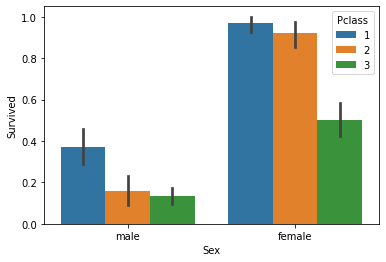




Pivot Table Representing the Percentage Survived by Sex by Class:


In [ ]:
#Did class affect the survival percentage by sex?

print("Count Amount of Sex-By-Class:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Pclass", aggfunc= "count"), "\n\n\nPercentage (Survival Rate) of Sex by Class Association:")


sns.barplot(x="Sex", y="Survived", hue="Pclass", data= train_df)
plt.show()

print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Class:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Pclass"])
table.style


Count Amount of Sex-By-Embarked:
Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441 


Percentage (Survival Rate) of Sex by Class Association:


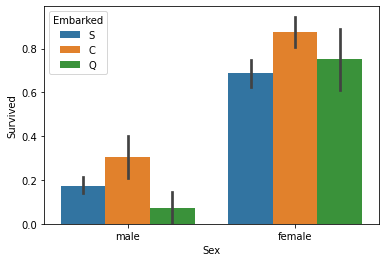




Pivot Table Representing the Percentage Survived by Sex by Embarked:
locations: C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
#Did embarking-from location affect the survival percentage by sex?

print("Count Amount of Sex-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Embarked", aggfunc= "count"), "\n\n\nPercentage (Survival Rate) of Sex by Class Association:")


sns.barplot(x="Sex", y="Survived", hue="Embarked", data= train_df)
plt.show()

print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Embarked:\nlocations: C = Cherbourg, Q = Queenstown, S = Southampton")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Embarked"])
table.style


In [ ]:
#Data Preprocessing
#Start by checking the values that are null
# check missing values in training data
print("Missing Values: ")
print(train_df.isnull().sum())

#create copy of train_df
training_dataframe = train_df.copy()

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#First we will fill in the Embarked Nulls with the mode of the rest of the data for that column
#1. Determine the mode
mode_embarked = training_dataframe['Embarked'].dropna().mode()[0]

#2. Fill in the Nulls with the 'Determined Mode'
training_dataframe['Embarked'].fillna(mode_embarked, inplace = True)

#3. Show the output of null values remaining:
print("Missing Values: ")
print(training_dataframe.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
#Might not need to do this just yet...

#First we will fill in the Age Nulls with the median of the rest of the data for that column
#1. Determine the median
training_dataframe["Age"].fillna(training_dataframe["Age"].median(skipna=True), inplace=True)

#2. Show the output of null values remaining:
print("Missing Values: ")
print(training_dataframe.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
#Changing Embarked -> Embarked_C , Embarked_Q, and Embarked_S

training_dataframe =pd.get_dummies(train_data, columns=["Embarked"])
print(training_dataframe.info())
print(training_dataframe.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB
None
   PassengerId  Survived  Pclass  ... Embarked_C Embarked_Q  Embarked_S
0            1         0       3  ...          0          0           1
1

In [ ]:
clf1 = LogisticRegression(solver='lbfgs', max_iter=10000)
clf1.fit(training, train_df['Survived'] )

LogisticRegression(max_iter=10000)

# Mapping Values to 0/1

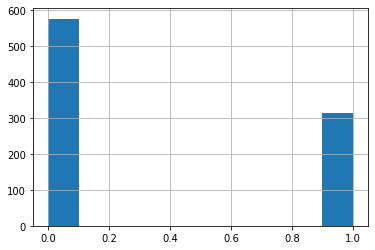

In [ ]:
testing = train_data.copy()
testing['Sex'] = testing['Sex'].apply({'male':0, 'female':1}.get)
testing['Sex'].hist()

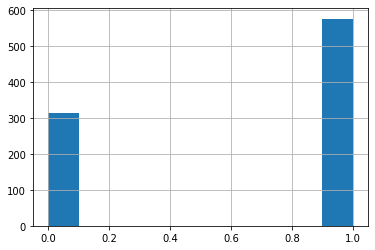

In [ ]:
testing = train_data.copy()
testing['Sex']=testing['Sex'].map({'female':0,'male':1})
testing['Sex'].hist()

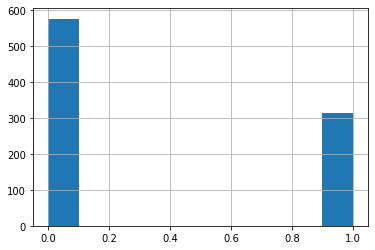

In [ ]:
testing = train_data.copy()
testing['Sex'].replace(['male', 'female'], [0,1],inplace=True)
testing['Sex'].hist()

## Test Data

In [ ]:
TitanicTest = pd.read_csv('TitanicTest.csv')

In [ ]:
print("Missing Values: ")
print(TitanicTest.isnull().sum())

Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
test_data = TitanicTest.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing.drop(columns=['PassengerId', 'Pclass', 'Name',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    object 
 1   Age         418 non-null    float64
 2   Embarked_C  418 non-null    uint8  
 3   Embarked_Q  418 non-null    uint8  
 4   Embarked_S  418 non-null    uint8  
dtypes: float64(1), object(1), uint8(3)
memory usage: 7.9+ KB
None
      Sex   Age  Embarked_C  Embarked_Q  Embarked_S
0    male  34.5           0           1           0
1  female  47.0           0           0           1
2    male  62.0           0           1           0
3    male  27.0           0           0           1
4  female  22.0           0           0           1


In [ ]:
predict = clf1.predict(testing)

In [ ]:
TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('Titanic2.csv', index=False, header=True)